In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

homedir = "/home/annzhou"
dirprefix = f"{homedir}/DRing/src/emp/datacentre"
fseedarr = range(1,6)
itemnamearr = ["leafspine","cfail","cfailequal"]
trafficnamedatalist = list()
multnamedatadict = dict()
sumfiledatadict = dict()

In [3]:
trafficname = "prv1"
trafficnamedatalist.append(trafficname)

leafspinemultnamearr = range(2,17,2)
dringmultnamearr = list(range(2,19,2))+list(range(20,61,10))
cfailmultnamearr = list(range(2,19,2))+list(range(20,31,10))
cfailequalmultnamearr = list(range(2,19,2))+list(range(20,31,10))
multnamedatadict[trafficname] = dict()
multnamedatadict[trafficname]["leafspine"] = leafspinemultnamearr
multnamedatadict[trafficname]["cfail"] = cfailmultnamearr
multnamedatadict[trafficname]["cfailequal"] = cfailequalmultnamearr

lssumfile = f"{dirprefix}/experiments/routing/{trafficname}_v1.txt"
cfailsumfile = f"{dirprefix}/experiments/controllerfailure/{trafficname}.txt"
cfailequalsumfile = f"{dirprefix}/experiments/controllerfailure2/{trafficname}.txt"
sumfiledatadict[trafficname] = dict()
sumfiledatadict[trafficname]["leafspine"] = lssumfile
sumfiledatadict[trafficname]["cfail"] = cfailsumfile
sumfiledatadict[trafficname]["cfailequal"] = cfailequalsumfile

In [4]:
trafficname = "cluster_a"
trafficnamedatalist.append(trafficname)

leafspinemultnamearr = [50,20,30,40,10,60,70]
cfailmultnamearr = range(10,91,10)
cfailequalmultnamearr = range(10,91,10)
multnamedatadict[trafficname] = dict()
multnamedatadict[trafficname]["leafspine"] = leafspinemultnamearr
multnamedatadict[trafficname]["cfail"] = cfailmultnamearr
multnamedatadict[trafficname]["cfailequal"] = cfailequalmultnamearr

sumfile = f"{dirprefix}/experiments/routing/{trafficname}.txt"
cfailsumfile = f"{dirprefix}/experiments/controllerfailure/{trafficname}.txt"
cfailequalsumfile = f"{dirprefix}/experiments/controllerfailure2/{trafficname}.txt"
sumfiledatadict[trafficname] = dict()
sumfiledatadict[trafficname]["leafspine"] = sumfile
sumfiledatadict[trafficname]["cfail"] = cfailsumfile
sumfiledatadict[trafficname]["cfailequal"] = cfailequalsumfile

/tmp/ipykernel_796524/2358691371.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[itrafficname].set_xticklabels([str(int(x)) for x in axs[itrafficname].get_xticks()], fontsize=16)
/tmp/ipykernel_796524/2358691371.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[itrafficname].set_yticklabels([str(int(x)) for x in axs[itrafficname].get_yticks()], fontsize=16)


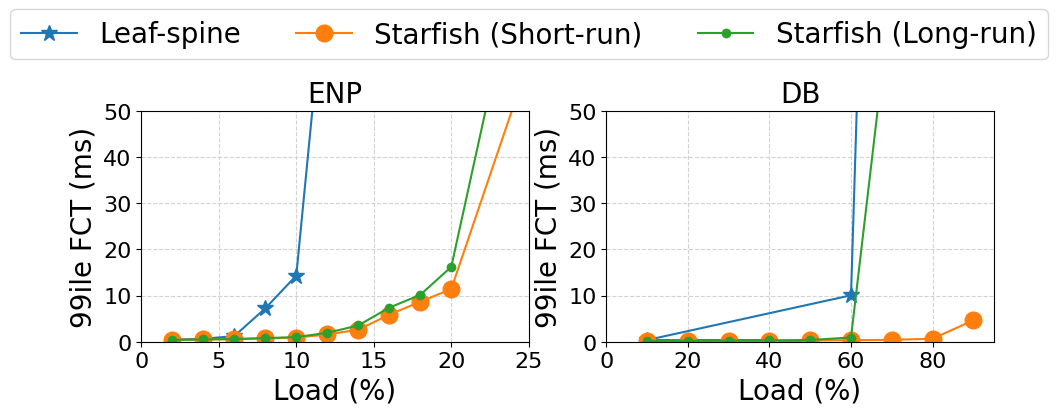

In [30]:
markerlist=['*','o','.']
labellist=["Leaf-spine","Starfish (Short-run)","Starfish (Long-run)"]
titlelist=["ENP","DB"]
xlimlist = [25,95]
ylimlist = [50,50]

# matplotlib.rcParams["figure.figsize"] = (4, 1.3)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig,axs = plt.subplots(1,2,figsize=(5*2+1,3*1))

for itrafficname,trafficname in enumerate(trafficnamedatalist):
    for iitemname,itemname in enumerate(itemnamearr):
        # print(f"{trafficname},{itemname}")
        xlist = list()
        ylist_over_mult = list()
        for multname in multnamedatadict[trafficname][itemname]:
            xlist.append(multname)

            with open(sumfiledatadict[trafficname][itemname],'r') as f:
                lines = f.readlines()
                fct_over_fseed = list()
                for fseed in fseedarr:
                    
                    if itemname == "leafspine":
                        logfile = f"m_leafspine_{trafficname}_{multname}_{fseed}.log"
                    elif itemname == "cfailequal":
                        logfile = f"m_dring_cf2_{trafficname}_{multname}_{fseed}.log"
                    else:
                        logfile = f"m_dring_{trafficname}_{multname}_{fseed}.log"
                    # print(logfile)

                    for line in lines:
                        tokens = line.split()
                        if tokens[0] == logfile:
                            n99fct = float(tokens[3])
                            fct_over_fseed.append(n99fct)
                ylist_over_mult.append(sum(fct_over_fseed)/len(fct_over_fseed))
        axs[itrafficname].plot(xlist,ylist_over_mult,label=labellist[iitemname],marker=markerlist[iitemname],markersize=12)
        axs[itrafficname].set_xlabel('Load (%)', fontsize=20)
        axs[itrafficname].set_ylabel('99ile FCT (ms)', fontsize=20)
        axs[itrafficname].set_title(titlelist[itrafficname], fontsize=20)
        axs[itrafficname].set_xlim(0,xlimlist[itrafficname])
        axs[itrafficname].set_ylim(0,ylimlist[itrafficname])
        axs[itrafficname].set_xticklabels([str(int(x)) for x in axs[itrafficname].get_xticks()], fontsize=16)
        axs[itrafficname].set_yticklabels([str(int(x)) for x in axs[itrafficname].get_yticks()], fontsize=16)
        axs[itrafficname].grid(color='lightgrey', linestyle='dashed', axis="both")

handles, labels = axs[0].get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(-0.2, 1.5), fontsize=20)
# plt.tight_layout()
plt.savefig(f"{homedir}/DRing/src/emp/datacentre/nsdi25_plotting/fig_failure_controller.pdf", dpi=600, bbox_inches='tight')
plt.show()